# Question 1 (c)


In [2]:
try:
    from matplotlib import pyplot as plt
except:
    !pip install --quiet matplotlib
    from matplotlib import pyplot as plt
    
try:
    import cirq
except ImportError:
    !pip install --quiet cirq
    import cirq

In [3]:
def show_circuit(name: str, circuit: cirq.Circuit) -> None:
    """Prints a circuit diagram inline.

    Args:
        name (str): name of circuit
        circuit (cirq.Circuit): circuit to print
    """
    print(f"*** {name} circuit ***")
    print(circuit)

In [4]:
def simulate_and_plot(circuit: cirq.Circuit, repetition: int = 1000) -> None:
    """Simulates a circuit and plots the results.

    Args:
        circuit (cirq.Circuit): circuit to simulate
        repetition (int, optional): number of repetitions. Defaults to 1000.
    """
    simulator = cirq.Simulator()
    results = simulator.run(circuit, repetitions=repetition)
    cirq.plot_state_histogram(results, plt.subplot())
    plt.tight_layout()
    plt.show()

## Code for $\Phi^+$ ($\beta_{00}$)


In [5]:
def bell00() -> cirq.Circuit:
    """Returns a circuit to create a Bell00 state.

    Returns:
        cirq.Circuit: circuit to create a Bell00 state
    """
    q0, q1 = cirq.LineQubit.range(2)

    circuit = cirq.Circuit()

    circuit.append(cirq.H(q0))
    circuit.append(cirq.CNOT(q0, q1))
    circuit.append(cirq.CNOT(q0, q1))
    circuit.append(cirq.H(q0))
    circuit.append(cirq.measure(q0, q1))
    return circuit

## Code for $\Phi^-$ ($\beta_{10}$)


In [6]:
def bell10() -> cirq.Circuit:
    """Returns a circuit to create a Bell10 state.

    Returns:
        cirq.Circuit: circuit to create a Bell10 state
    """
    q0, q1 = cirq.LineQubit.range(2)

    circuit = cirq.Circuit()

    circuit.append(cirq.H(q0))
    circuit.append(cirq.CNOT(q0, q1))
    circuit.append(cirq.Z(q1))
    circuit.append(cirq.CNOT(q0, q1))
    circuit.append(cirq.H(q0))
    circuit.append(cirq.measure(q0, q1))

    return circuit

## Code for $\Psi^+$ ($\beta_{01}$)


In [7]:
def bell01() -> cirq.Circuit:
    """Returns a circuit to create a Bell01 state.

    Returns:
        cirq.Circuit: circuit to create a Bell01 state
    """
    q0, q1 = cirq.LineQubit.range(2)

    circuit = cirq.Circuit()

    circuit.append(cirq.H(q0))
    circuit.append(cirq.X(q1))
    circuit.append(cirq.CNOT(q0, q1))
    circuit.append(cirq.CNOT(q0, q1))
    circuit.append(cirq.H(q0))
    circuit.append(cirq.measure(q0, q1))

    return circuit

## Code for $\Psi^-$ ($\beta_{11}$)


In [8]:
def bell11() -> cirq.Circuit:
    """Returns a circuit to create a Bell11 state.

    Returns:
        cirq.Circuit: circuit to create a Bell11 state
    """
    q0, q1 = cirq.LineQubit.range(2)

    circuit = cirq.Circuit()

    circuit.append(cirq.H(q0))
    circuit.append(cirq.X(q1))
    circuit.append(cirq.CNOT(q0, q1))
    circuit.append(cirq.Z(q1))
    circuit.append(cirq.CNOT(q0, q1))
    circuit.append(cirq.H(q0))
    circuit.append(cirq.measure(q0, q1))

    return circuit

*** Bell00 circuit ***
0: ───H───@───@───H───M───
          │   │       │
1: ───────X───X───────M───


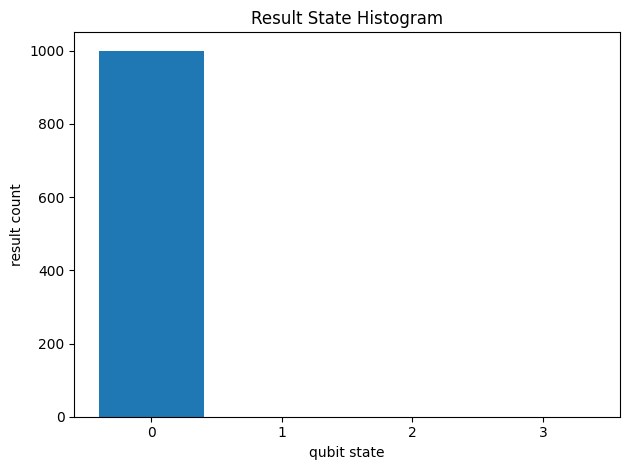

*** Bell10 circuit ***
0: ───H───@───────@───H───M───
          │       │       │
1: ───────X───Z───X───────M───


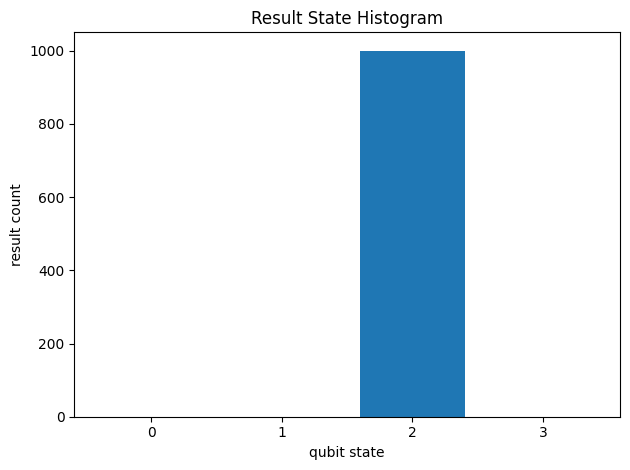

*** Bell01 circuit ***
0: ───H───@───@───H───M───
          │   │       │
1: ───X───X───X───────M───


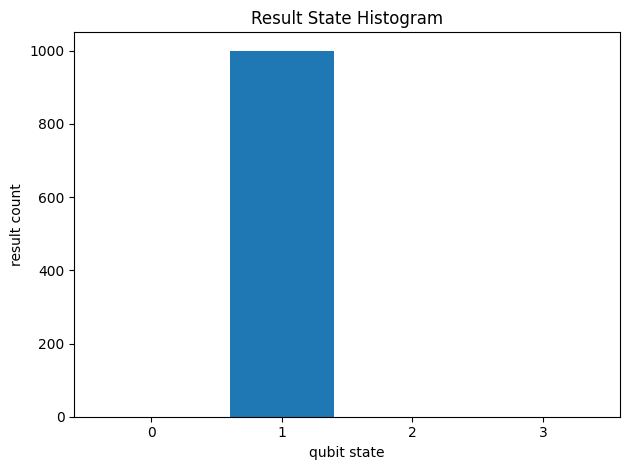

*** Bell11 circuit ***
0: ───H───@───────@───H───M───
          │       │       │
1: ───X───X───Z───X───────M───


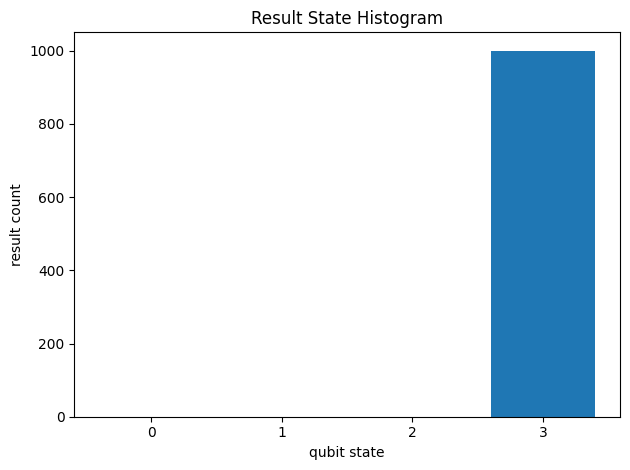

In [9]:
circuits = [bell00(), bell10(), bell01(), bell11()]
names = ["Bell00", "Bell10", "Bell01", "Bell11"]
for name, circuit in zip(names, circuits):
    show_circuit(name, circuit)
    simulate_and_plot(circuit)

# Question 2 (e)


## Taking $\ket{0}$ as input


*** GHZ-like circuit ***
0: ───────────────@───H───M───────────@───────
                  │       │           │
1: ───H───────@───X───────M───@───────┼───────
              │           │   │       │
2: ───H───@───X───────────┼───┼───X───@───M───
          │               │   │   │
3: ───X───X───X───────────M───X───@───────────


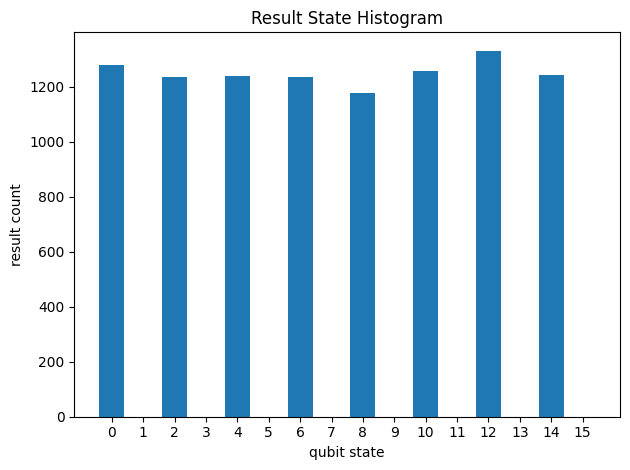

In [21]:
q0, q1, q2, q3 = cirq.LineQubit.range(4)

circuit = cirq.Circuit()

circuit.append(cirq.H(q1))
circuit.append(cirq.H(q2))
circuit.append(cirq.X(q3))
circuit.append(cirq.CNOT(q2, q3))
circuit.append(cirq.CNOT(q1, q2))

circuit.append(cirq.CNOT(q0, q1))
circuit.append(cirq.H(q0))
circuit.append(cirq.X(q3))
circuit.append(cirq.measure(q0, q1, q3))
circuit.append(cirq.CNOT(q1, q3))
circuit.append(cirq.X(q2).controlled_by(q3))
circuit.append(cirq.Z(q2).controlled_by(q0))
circuit.append(cirq.measure(q2))

show_circuit("GHZ-like", circuit)
simulate_and_plot(circuit, 10000)

## Taking $\ket{1}$ as input


*** GHZ-like circuit ***
0: ───X───────────@───H───M───────────@───────
                  │       │           │
1: ───H───────@───X───────M───@───────┼───────
              │           │   │       │
2: ───H───@───X───────────┼───┼───X───@───M───
          │               │   │   │
3: ───X───X───X───────────M───X───@───────────


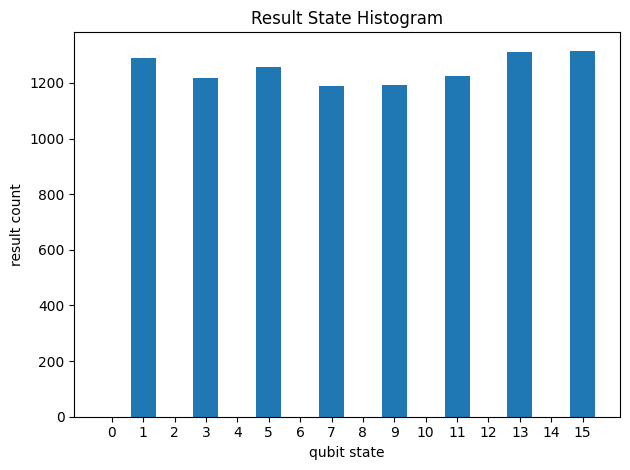

In [22]:
q0, q1, q2, q3 = cirq.LineQubit.range(4)

circuit = cirq.Circuit()

circuit.append(cirq.H(q1))
circuit.append(cirq.H(q2))
circuit.append(cirq.X(q3))
circuit.append(cirq.X(q0))
circuit.append(cirq.CNOT(q2, q3))
circuit.append(cirq.CNOT(q1, q2))

circuit.append(cirq.CNOT(q0, q1))
circuit.append(cirq.H(q0))
circuit.append(cirq.X(q3))
circuit.append(cirq.measure(q0, q1, q3))
circuit.append(cirq.CNOT(q1, q3))
circuit.append(cirq.X(q2).controlled_by(q3))
circuit.append(cirq.Z(q2).controlled_by(q0))
circuit.append(cirq.measure(q2))

show_circuit("GHZ-like", circuit)
simulate_and_plot(circuit, 10000)

## Taking $\ket{+}$ as input


*** GHZ-like circuit ***
0: ───H───────────@───H───M───────────@───────
                  │       │           │
1: ───H───────@───X───────M───@───────┼───────
              │           │   │       │
2: ───H───@───X───────────┼───┼───X───@───M───
          │               │   │   │
3: ───X───X───X───────────M───X───@───────────


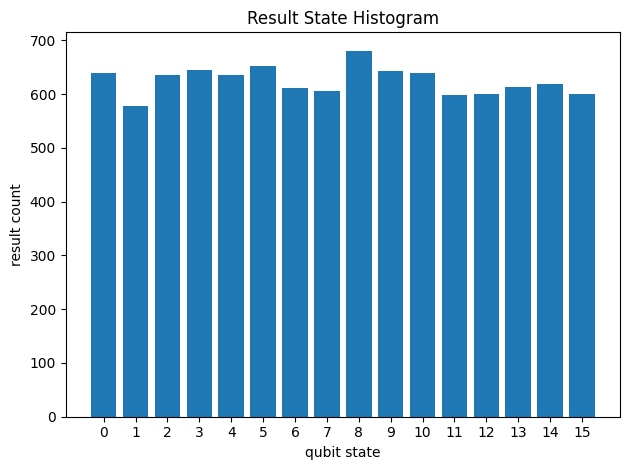

In [24]:
q0, q1, q2, q3 = cirq.LineQubit.range(4)

circuit = cirq.Circuit()

circuit.append(cirq.H(q1))
circuit.append(cirq.H(q2))
circuit.append(cirq.X(q3))
circuit.append(cirq.H(q0))
circuit.append(cirq.CNOT(q2, q3))
circuit.append(cirq.CNOT(q1, q2))

circuit.append(cirq.CNOT(q0, q1))
circuit.append(cirq.H(q0))
circuit.append(cirq.X(q3))
circuit.append(cirq.measure(q0, q1, q3))
circuit.append(cirq.CNOT(q1, q3))
circuit.append(cirq.X(q2).controlled_by(q3))
circuit.append(cirq.Z(q2).controlled_by(q0))
circuit.append(cirq.measure(q2))

show_circuit("GHZ-like", circuit)
simulate_and_plot(circuit, 10000)